# Doğal Dil İşleme (NLP) - Temel Konular
Bu notebook, NLP'nin temel konularını kod örnekleriyle göstermektedir.

### Kütüphanelerin Yüklenmesi ve Hazırlık
**Kodun Amacı:** NLP işlemleri için gerekli araçları çalışma ortamına dahil etmek.
*   **Mantık:**
    *   `nltk`: Metin işleme için temel kütüphane (tokenization, stemming vb. için).
    *   `sklearn`: Metni sayısal vektörlere dönüştürmek (BoW, TF-IDF) ve boyut indirgeme (PCA) için.
    *   `gensim`: Word2Vec gibi kelime gömme (word embedding) modelleri için.
    *   `nltk.download(...)`: NLTK'nın çalışması için gereken dil veritabanlarını (noktalama işaretleri, kelime türleri, sözlükler) internetten indirir.

In [8]:
# Gerekli kütüphaneleri yükleyin
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

# NLTK verilerini indirin
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)


True

## 1. Regular Expressions (Regex)
Regex, metin içinde desen eşleştirme için kullanılır.

**Kodun Amacı:** Metin içinden belirli desenlere uyan bilgileri (e-posta, telefon) çıkarmak veya metni temizlemek.
*   **Mantık:**
    *   `re.findall`: Belirlenen şablona (örneğin `@` işareti içeren kelimeler veya `05xx` ile başlayan sayılar) uyan tüm parçaları bulur.
    *   `re.sub`: Metin içindeki harf olmayan karakterleri (noktalama, sayı vb.) silerek metni temizler. Bu, metni analize hazırlamak için önemlidir.

In [9]:
text = "Merhaba! E-posta adresim: ornek@email.com ve telefon: 0532-123-45-67"

# E-posta bulma
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
emails = re.findall(email_pattern, text)
print(f"E-postalar: {emails}")

# Telefon numarası bulma
phone_pattern = r'\d{4}-\d{3}-\d{2}-\d{2}'
phones = re.findall(phone_pattern, text)
print(f"Telefon numaraları: {phones}")

# Sadece harfleri tutma
only_letters = re.sub(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]', '', text)
print(f"Sadece harfler: {only_letters}")

E-postalar: ['ornek@email.com']
Telefon numaraları: ['0532-123-45-67']
Sadece harfler: Merhaba Eposta adresim ornekemailcom ve telefon 


## 2. Word Level Tokenization
Metni kelimelere ayırma işlemi.

**Kodun Amacı:** Bütün halindeki metni işlenebilir küçük birimlere (token) bölmek.
*   **Word Level (Kelime Bazlı):** Cümleyi kelimelerine ayırır. `word_tokenize` fonksiyonu, basit boşluktan bölme (`split`) işlemine göre daha akıllıdır (örneğin "don't" kelimesini "do" ve "n't" veya noktayı ayrı bir token olarak ayırabilir).

In [10]:
sample_text = "Natural language processing is amazing! It helps computers understand human language."

# NLTK ile tokenization
tokens = word_tokenize(sample_text)
print(f"Word tokens: {tokens}")
print(f"Toplam token sayısı: {len(tokens)}")

# Basit split ile
simple_tokens = sample_text.lower().split()
print(f"\nBasit split: {simple_tokens}")

Word tokens: ['Natural', 'language', 'processing', 'is', 'amazing', '!', 'It', 'helps', 'computers', 'understand', 'human', 'language', '.']
Toplam token sayısı: 13

Basit split: ['natural', 'language', 'processing', 'is', 'amazing!', 'it', 'helps', 'computers', 'understand', 'human', 'language.']


## 3. Character Level Tokenization
Metni karakterlere ayırma.

**Kodun Amacı:** Metni karakterlere ayırma.
*   **Character Level (Karakter Bazlı):** Metni harf harf böler. Bu, harf sırasının önemli olduğu derin öğrenme modellerinde kullanılır.

In [11]:
text = "NLP"

# Her karakteri ayırma
char_tokens = list(text)
print(f"Karakter tokenları: {char_tokens}")

# Benzersiz karakterler
unique_chars = set(text.lower())
print(f"Benzersiz karakterler: {unique_chars}")

# Karakter indeksleme (örnek)
char_to_idx = {ch: i for i, ch in enumerate(sorted(unique_chars))}
print(f"Karakter indeksleri: {char_to_idx}")

Karakter tokenları: ['N', 'L', 'P']
Benzersiz karakterler: {'n', 'l', 'p'}
Karakter indeksleri: {'l': 0, 'n': 1, 'p': 2}


## 4. POS (Part-of-Speech) Tagging
Kelimelerin dilbilgisel rollerini belirleme.

**Kodun Amacı:** Her kelimenin cümlesindeki dilbilgisel görevini (İsim, Fiil, Sıfat vb.) belirlemek.
*   **Mantık:** `pos_tag` fonksiyonu, kelimeleri ve bağlamlarını analiz ederek onlara etiketler atar (Örn: `NN` -> İsim, `VB` -> Fiil). Bu, kelimenin anlamını çözmek için kritiktir (örneğin "yüz" kelimesi sayı mı, organ mı, fiil mi?).

In [12]:
sentence = "The quick brown fox jumps over the lazy dog"
tokens = word_tokenize(sentence)

# POS etiketleme
pos_tags = pos_tag(tokens)
print("POS Tags:")
for word, tag in pos_tags:
    print(f"{word:10} -> {tag}")

# Tag açıklamaları
print("\nTag açıklamaları:")
print("NN: Noun, VBZ: Verb 3rd person, JJ: Adjective, DT: Determiner")

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng[0m

  Searched in:
    - 'C:\\Users\\w/nltk_data'
    - 'c:\\Users\\w\\Desktop\\Kodlama\\VsCode\\HelloWorld\\Eğitim\\myenv\\nltk_data'
    - 'c:\\Users\\w\\Desktop\\Kodlama\\VsCode\\HelloWorld\\Eğitim\\myenv\\share\\nltk_data'
    - 'c:\\Users\\w\\Desktop\\Kodlama\\VsCode\\HelloWorld\\Eğitim\\myenv\\lib\\nltk_data'
    - 'C:\\Users\\w\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


## 5. Stemming
Kelimeleri kök formlarına indirger (kaba yaklaşım).

**Kodun Amacı:** Kelimeleri çekim eklerinden arındırıp kök hallerine getirmek.
*   **Stemming (PorterStemmer):** Kelimenin sonunu kaba bir kural setiyle keser. Hızlıdır ama bazen anlamsız kökler çıkarabilir (Örn: "easili").

In [13]:
stemmer = PorterStemmer()

words = ["running", "runs", "ran", "easily", "fairly", "computing", "computed", "computer"]

print("Stemming örnekleri:")
for word in words:
    stem = stemmer.stem(word)
    print(f"{word:15} -> {stem}")

Stemming örnekleri:
running         -> run
runs            -> run
ran             -> ran
easily          -> easili
fairly          -> fairli
computing       -> comput
computed        -> comput
computer        -> comput


## 6. Lemmatization
Kelimeleri sözlük formlarına (lemma) dönüştürür.

**Kodun Amacı:** Kelimeleri sözlük formlarına (lemma) dönüştürür.
*   **Lemmatization (WordNetLemmatizer):** Kelimenin sözlükteki kökünü bulur. Daha yavaştır ama dilbilgisine uygun gerçek kökü verir (Örn: "better" -> "good").

In [14]:
lemmatizer = WordNetLemmatizer()

words = ["running", "runs", "ran", "easily", "fairly", "computing", "computed", "better", "worse"]

print("Lemmatization örnekleri:")
for word in words:
    lemma = lemmatizer.lemmatize(word, pos='v')  # v=verb
    print(f"{word:15} -> {lemma}")

print("\nStemming vs Lemmatization:")
test_word = "better"
print(f"Stem: {stemmer.stem(test_word)}")
print(f"Lemma: {lemmatizer.lemmatize(test_word, pos='a')}")

Lemmatization örnekleri:
running         -> run
runs            -> run
ran             -> run
easily          -> easily
fairly          -> fairly
computing       -> compute
computed        -> compute
better          -> better
worse           -> worse

Stemming vs Lemmatization:
Stem: better
Lemma: good


## 7. Bag of Words (BoW)
Metni kelime frekanslarına göre vektöre dönüştürür.

**Kodun Amacı:** Metni sayısal vektörlere dönüştürmek.
*   **Bag of Words (BoW - CountVectorizer):**
    *   **Mantık:** Bir kelime havuzu (vocabulary) oluşturur ve her cümlede hangi kelimenin **kaç kere geçtiğini** sayar. Kelime sırasını önemsemez, sadece varlığına bakar.

In [15]:
corpus = [
    "I love machine learning",
    "I love deep learning",
    "Machine learning is great"
]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(corpus)

print("Vocabulary (Kelime Haznesi):")
print(vectorizer.get_feature_names_out())

print("\nBag of Words Matrisi:")
print(bow_matrix.toarray())

print("\nHer cümle için vektör:")
for i, doc in enumerate(corpus):
    print(f"Cümle {i+1}: {bow_matrix.toarray()[i]}")

Vocabulary (Kelime Haznesi):
['deep' 'great' 'is' 'learning' 'love' 'machine']

Bag of Words Matrisi:
[[0 0 0 1 1 1]
 [1 0 0 1 1 0]
 [0 1 1 1 0 1]]

Her cümle için vektör:
Cümle 1: [0 0 0 1 1 1]
Cümle 2: [1 0 0 1 1 0]
Cümle 3: [0 1 1 1 0 1]


## 8. N-gram
Ardışık n kelimelik dizileri kullanır.

**Kodun Amacı:** Kelime gruplarını yakalamak.
*   **N-Gram:**
    *   **Mantık:** Kelimeleri tek tek değil, gruplar halinde alır (Örn: "yapay zeka" -> 2-gram). Bu sayede "değil" gibi olumsuzluk bildiren veya birlikte anlam kazanan kelime grupları yakalanır.

In [16]:
corpus = [
    "natural language processing",
    "language processing is fun",
    "processing natural language"
]

# Unigram (1-gram)
unigram_vec = CountVectorizer(ngram_range=(1, 1))
unigram_matrix = unigram_vec.fit_transform(corpus)
print("Unigrams:")
print(unigram_vec.get_feature_names_out())

# Bigram (2-gram)
bigram_vec = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vec.fit_transform(corpus)
print("\nBigrams:")
print(bigram_vec.get_feature_names_out())

# Trigram (3-gram)
trigram_vec = CountVectorizer(ngram_range=(3, 3))
trigram_matrix = trigram_vec.fit_transform(corpus)
print("\nTrigrams:")
print(trigram_vec.get_feature_names_out())

# 1-2 gram kombinasyonu
combined_vec = CountVectorizer(ngram_range=(1, 2))
combined_matrix = combined_vec.fit_transform(corpus)
print("\n1-2 Gram Kombinasyonu:")
print(combined_vec.get_feature_names_out())

Unigrams:
['fun' 'is' 'language' 'natural' 'processing']

Bigrams:
['is fun' 'language processing' 'natural language' 'processing is'
 'processing natural']

Trigrams:
['language processing is' 'natural language processing'
 'processing is fun' 'processing natural language']

1-2 Gram Kombinasyonu:
['fun' 'is' 'is fun' 'language' 'language processing' 'natural'
 'natural language' 'processing' 'processing is' 'processing natural']


## 9. TF-IDF (Term Frequency-Inverse Document Frequency)
Kelimelerin önemini belgeler arası karşılaştırarak hesaplar.

**Kodun Amacı:** Kelimelerin önemini ağırlıklandırmak.
*   **TF-IDF:**
    *   **Mantık:** Sadece kelime sayısına bakmak yerine, kelimenin **önemini** hesaplar. Eğer bir kelime bir belgede çok geçiyor ama tüm belgelerde de çok geçiyorsa (örneğin "ve", "bir"), onun ayırt edici özelliği düşüktür. TF-IDF, nadir bulunan ama o belgeye özel kelimelere daha yüksek puan verir.

In [17]:
corpus = [
    "the cat sat on the mat",
    "the dog sat on the log",
    "cats and dogs are great"
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

print("Kelimeler:")
print(tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Matrisi:")
print(np.round(tfidf_matrix.toarray(), 2))

print("\nHer belge için en önemli kelimeler:")
feature_names = tfidf_vectorizer.get_feature_names_out()
for i, doc in enumerate(corpus):
    tfidf_scores = tfidf_matrix.toarray()[i]
    top_indices = tfidf_scores.argsort()[-3:][::-1]
    top_words = [feature_names[idx] for idx in top_indices]
    print(f"Belge {i+1}: {top_words}")

Kelimeler:
['and' 'are' 'cat' 'cats' 'dog' 'dogs' 'great' 'log' 'mat' 'on' 'sat'
 'the']

TF-IDF Matrisi:
[[0.   0.   0.43 0.   0.   0.   0.   0.   0.43 0.33 0.33 0.65]
 [0.   0.   0.   0.   0.43 0.   0.   0.43 0.   0.33 0.33 0.65]
 [0.45 0.45 0.   0.45 0.   0.45 0.45 0.   0.   0.   0.   0.  ]]

Her belge için en önemli kelimeler:
Belge 1: ['the', 'mat', 'cat']
Belge 2: ['the', 'log', 'dog']
Belge 3: ['cats', 'are', 'dogs']


## 10. Word2Vec
Kelimeleri yoğun vektörlere dönüştürür ve anlam ilişkilerini yakalar.

**Kodun Amacı:** Kelimeler arasındaki **anlamsal ilişkileri** yakalamak.
*   **Word2Vec:**
    *   **Mantık:** Kelimeleri yoğun (dense) vektörlere dönüştürür. Benzer bağlamda kullanılan kelimelerin vektörleri uzayda birbirine yakın olur.
    *   **Örnek:** Kodda gösterilen aritmetik işlem (`Kral - Erkek + Kadın = Kraliçe`), modelin kelimeler arasındaki cinsiyet ve statü ilişkisini matematiksel olarak öğrendiğini kanıtlar.

In [18]:
# Örnek veri seti
sentences = [
    ["king", "is", "a", "strong", "man"],
    ["queen", "is", "a", "wise", "woman"],
    ["boy", "is", "a", "young", "man"],
    ["girl", "is", "a", "young", "woman"],
    ["prince", "is", "a", "young", "king"],
    ["princess", "is", "a", "young", "queen"],
    ["man", "is", "strong"],
    ["woman", "is", "pretty"],
    ["prince", "is", "a", "boy", "will", "be", "king"],
    ["princess", "is", "a", "girl", "will", "be", "queen"]
]

# Word2Vec modeli oluştur
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=0)

# Kelime vektörleri
print("'king' kelimesinin vektörü (ilk 10 boyut):")
print(model.wv['king'][:10])

# Benzer kelimeler
print("\n'king' kelimesine en benzer kelimeler:")
similar_words = model.wv.most_similar('king', topn=3)
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

# Kelime aritmetiği: king - man + woman = ?
print("\nKelime Aritmetiği (king - man + woman):")
result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Sonuç: {result[0][0]}")

'king' kelimesinin vektörü (ilk 10 boyut):
[-0.01648893  0.01860505 -0.00039911 -0.00392994  0.00919075 -0.00820677
  0.00550276  0.01390475  0.01212887 -0.01503085]

'king' kelimesine en benzer kelimeler:
man: 0.1834
prince: 0.1699
be: 0.1135

Kelime Aritmetiği (king - man + woman):
Sonuç: prince


### Word2Vec - Vektör Uzayı Görselleştirmesi

**Kodun Amacı:** Vektör uzayını görselleştirmek.
*   **Görselleştirme (PCA):**
    *   **Mantık:** Yüksek boyutlu kelime vektörlerini, insan gözünün görebileceği 2 boyuta (X ve Y ekseni) indirger. Grafikte benzer kelimelerin (örn: "king", "prince", "man") bir arada kümelendiği görülür.

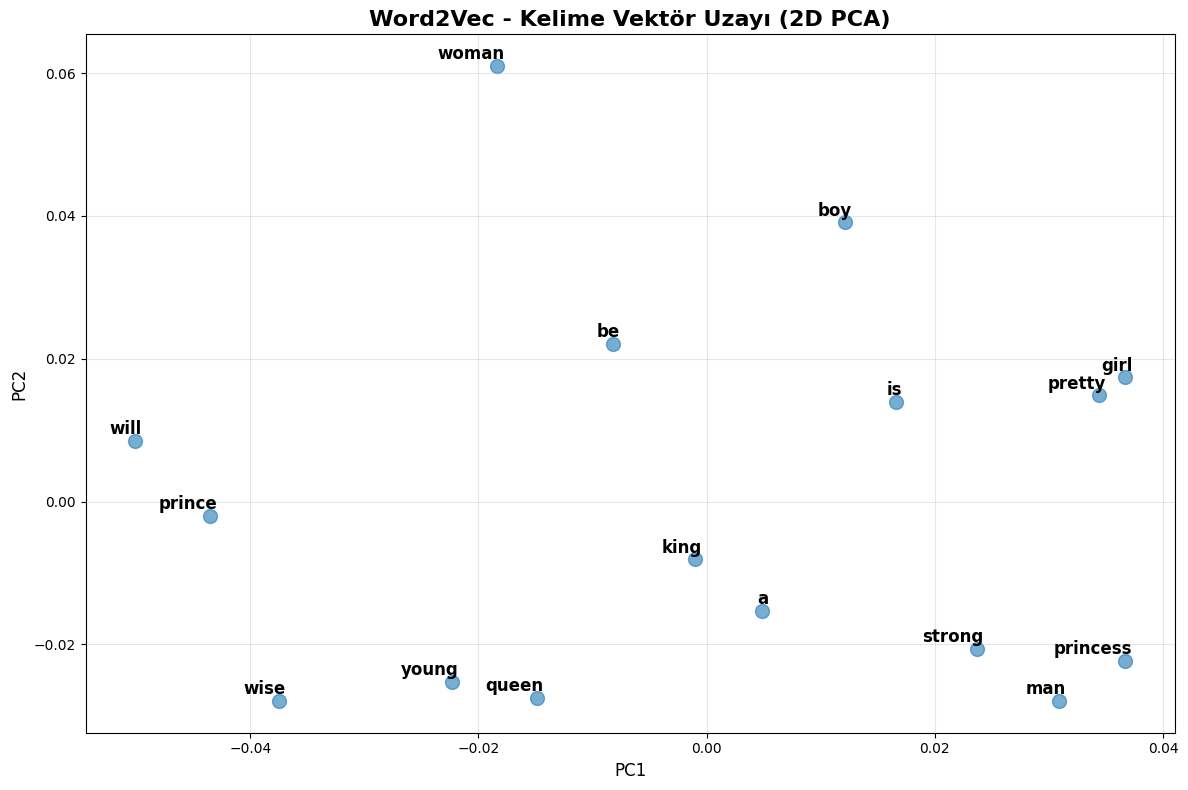


Açıklanan varyans: 23.83%


In [19]:
# Kelimeleri al
words = list(model.wv.key_to_index.keys())

# Vektörleri al
word_vectors = np.array([model.wv[word] for word in words])

# PCA ile 2D'ye indirgeme
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Görselleştirme
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], alpha=0.6, s=100)

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
                 xytext=(5, 2), textcoords='offset points', ha='right', va='bottom',
                 fontsize=12, weight='bold')

plt.title('Word2Vec - Kelime Vektör Uzayı (2D PCA)', fontsize=16, weight='bold')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAçıklanan varyans: {sum(pca.explained_variance_ratio_)*100:.2f}%")

## 11. GloVe (Global Vectors)
GloVe benzeri bir yaklaşımla kelime vektörleri oluşturma.

**Kodun Amacı:** GloVe benzeri vektörler oluşturmak.
*   **GloVe:** Kelime eş oluşum (co-occurrence) matrislerini kullanarak vektörler oluşturur. Burada Word2Vec kullanılarak benzer bir mantık simüle edilmiştir.

In [20]:
# Not: GloVe orijinal olarak Stanford tarafından geliştirildi
# Burada basit bir demonstrasyon için Word2Vec'in CBOW modelini kullanıyoruz
# Gerçek GloVe implementasyonu için glove-python veya önceden eğitilmiş vektörler kullanılabilir

# Daha büyük corpus
glove_sentences = sentences + [
    ["the", "king", "loves", "the", "queen"],
    ["the", "queen", "loves", "the", "king"],
    ["the", "prince", "is", "the", "son", "of", "king"],
    ["the", "princess", "is", "the", "daughter", "of", "queen"],
]

# Global matrix factorization benzeri (Word2Vec ile)
glove_model = Word2Vec(glove_sentences, vector_size=50, window=10, min_count=1, workers=4, sg=0)

print("GloVe-style Model:")
print("\n'queen' kelimesine en benzer kelimeler:")
similar = glove_model.wv.most_similar('queen', topn=5)
for word, score in similar:
    print(f"{word}: {score:.4f}")

# Cosine similarity hesaplama
print("\nKelime Benzerlikleri:")
print(f"king-queen: {glove_model.wv.similarity('king', 'queen'):.4f}")
print(f"king-man: {glove_model.wv.similarity('king', 'man'):.4f}")
print(f"queen-woman: {glove_model.wv.similarity('queen', 'woman'):.4f}")

GloVe-style Model:

'queen' kelimesine en benzer kelimeler:
be: 0.1898
prince: 0.0448
woman: -0.0105
is: -0.0144
of: -0.0234

Kelime Benzerlikleri:
king-queen: -0.2061
king-man: -0.0636
queen-woman: -0.0105


### GloVe - Vektör Uzayı Görselleştirmesi

**Kodun Amacı:** GloVe vektörlerini görselleştirmek.
*   **Görselleştirme:** PCA kullanarak vektörleri 2 boyuta indirger ve görselleştirir.

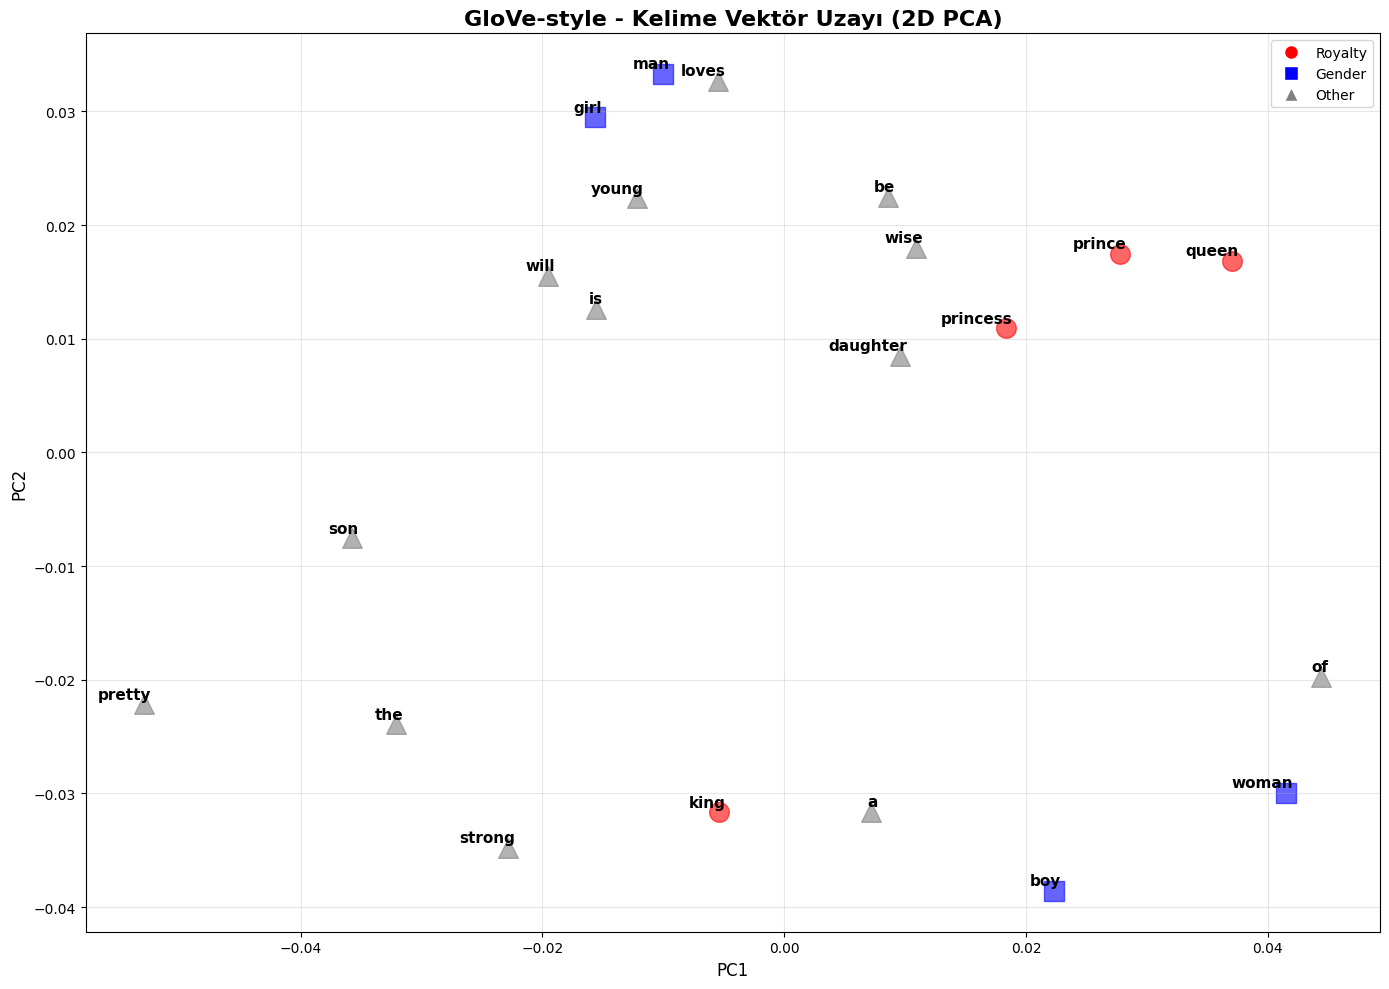

Açıklanan varyans: 20.14%


In [21]:
# Kelimeleri al
glove_words = list(glove_model.wv.key_to_index.keys())

# Vektörleri al
glove_vectors = np.array([glove_model.wv[word] for word in glove_words])

# PCA ile 2D'ye indirgeme
pca_glove = PCA(n_components=2)
glove_vectors_2d = pca_glove.fit_transform(glove_vectors)

# Görselleştirme
plt.figure(figsize=(14, 10))

# Farklı kelime kategorileri için renkler
royalty = ['king', 'queen', 'prince', 'princess']
gender = ['man', 'woman', 'boy', 'girl']

for i, word in enumerate(glove_words):
    x, y = glove_vectors_2d[i, 0], glove_vectors_2d[i, 1]
    
    if word in royalty:
        color = 'red'
        marker = 'o'
    elif word in gender:
        color = 'blue'
        marker = 's'
    else:
        color = 'gray'
        marker = '^'
    
    plt.scatter(x, y, c=color, marker=marker, s=200, alpha=0.6)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', fontsize=11, weight='bold')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Royalty', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='s', color='w', label='Gender', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Other', markerfacecolor='gray', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.title('GloVe-style - Kelime Vektör Uzayı (2D PCA)', fontsize=16, weight='bold')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Açıklanan varyans: {sum(pca_glove.explained_variance_ratio_)*100:.2f}%")

## Özet

Bu notebook'ta şu konuları işledik:

1. **Regex**: Metin içinde desen eşleştirme
2. **Word Tokenization**: Metni kelimelere ayırma
3. **Character Tokenization**: Metni karakterlere ayırma
4. **POS Tagging**: Dilbilgisel etiketleme
5. **Stemming**: Kelime kökü bulma (kaba)
6. **Lemmatization**: Kelime kökü bulma (sözlük tabanlı)
7. **Bag of Words**: Kelime frekansı tabanlı vektörleştirme
8. **N-gram**: Ardışık kelime dizileri
9. **TF-IDF**: Kelime önem skorları
10. **Word2Vec**: Yoğun kelime vektörleri ve vektör uzayı görselleştirmesi
11. **GloVe**: Global vektör temsilleri ve görselleştirme

Her teknik, NLP pipeline'ında farklı amaçlar için kullanılır!